<div style="text-align: right"> 13.12.2019</div>

***Name:*** 

# Hausaufgabe Blatt 8

## Rollen: Schiefe Ebene 

Wir betrachten einen Zylinder mit Radius $R$, Masse $m$ und Kreismittelpunkt $M$. Wir wollen die Bewegung des Zylinders entlang einer schiefen Ebene berechnen und visualisieren. Die schiefe Ebene hat einen Neigungswinkel $\theta = 12^{\circ}$. Der Startpunkt des Zylinders befinde sich $h_0=1$ über dem Boden.


<img src="./rollingPlane.png" alt="rollingPlane" width="300"/>

Die Höhe $h$ nach der auf der Ebene zurückgelegten Strecke $l$ beträgt
$$
h = h_0 - l \sin \theta
$$

und somit gilt für die potentielle Energie:
$$
E_{\mathrm{pot}} = m g (h_0 - l \sin \theta).
$$

Die kinetische Energie setzt sich zusammen aus der Translationsenergie $E_\mathrm{trans}=\frac{1}{2}mv^2 = \frac{1}{2}m\omega^2 R^2$ und der Rotationsenergie um die Hauptrotationsachse $E_\mathrm{rot}=\frac{1}{2}I\omega^2$, wobei $I$ das Trägheitsmoment des Zylinders (mit $I = \frac{MR^2}{2}$ für einen Vollzylinder) bezüglich seiner Hauptrotationsachse ist
$$
E_\mathrm{kin}= E_\mathrm{trans} + E_\mathrm{rot} = \frac{1}{2}\left(I+mR^2\right)\omega^2
$$
mit $\omega = \frac{2\pi v}{R}$.
Die potentielle Energie wird beim Rollen in kinetische Energie umgesetzt. Es gilt also nach zurückgelegter Strecke $l$
$$
 m g l \sin \theta = \frac{1}{2}\left(I+mR^2\right)\omega^2.
$$
$$ 
    \Rightarrow v = \omega \cdot R = \sqrt{\frac{4 g l \sin \theta}{3}}.
$$
**a)** Nehmen Sie an, es handle sich um einen Vollzylinder mit der Masse $m=1$ und einem Radius $R=0.1$.
Plotten Sie die Geschwindigkeit $v$ des Mittelpunktes $M$ in Abhängigkeit von der zurückgelegten Strecke $l$.

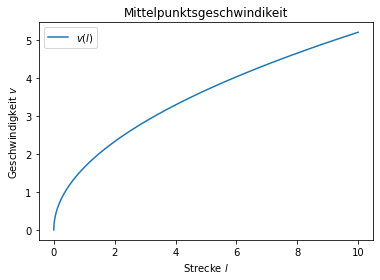

In [1]:
# Bibliotheken importieren
import numpy as np
from matplotlib import pyplot as plt
# Konstanten initialisieren
g = 9.81
theta = np.pi * 3/45
m = 1
r = 0.1
h0 = 1
# Array für Strecke
l = np.linspace(0, 10, 500)
# v berechnen
v = (4/3*g*l*np.sin(theta))**0.5

# Plot initialisieren
plt.figure()
plt.title("Mittelpunktsgeschwindikeit")
plt.xlabel("Strecke $l$")
plt.ylabel("Geschwindigkeit $v$")
plt.plot(l, v, label="$v(l)$")
plt.legend()

**b)** Plotten Sie die $y$-Komponente des Punktes $A$ gegen die Zeit $t$ im mit dem Mittelpunkt M translatierenden Koordinatensystem. Plotten Sie ebenfalls die Bahnkurve (also $x(t)$ gegen $y(t)$) des Mittelpunkts $M$ und die Bahnkurve des Punktes $A$ im ruhenden Bezugssystem. Hinweis: Die Situation hier ähnelt Übungsblattaufgabe Nr. 2.5.

DGL
$$
    v^2 = \dot{l}^2 = \frac{4}{3} g l \sin\theta
$$
wird gelöst durch
$$
    l(t) = \frac{2}{3} g l t^2 \sin\theta
$$

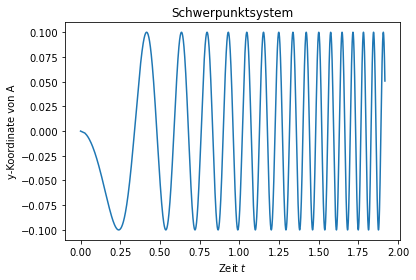

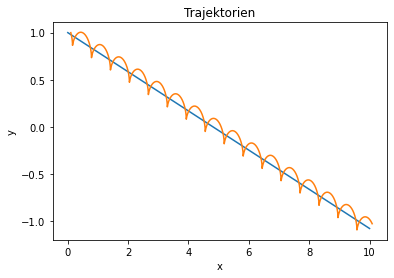

In [2]:
# Hilfe zur Berechnung von t:
t = np.zeros_like(v) # hier ist v die vorher berechnete Geschwindigkeit v
t[1:] = l[1:] / v[1:] # Berechnung der Zeit; l ist die zurückgelegte Distanz wie in der Aufgabenstellung beschrieben
# Diese Art auf arrays zuzugreifen nennt man *slicing*. 

# Berechne die Koordinaten x und y von M in Abhängigkeit von l und theta
M = 0 # im Schwerpunktsystem ist der Schwerpunkt offensichtlich immer im Ursprung
M = np.array([l, h0 - l * np.sin(theta)]) # Koordinaten des Schwerpunktes im raumfesten System
# Berechne die Koordinaten des Punkts A im mit dem Mittelpunkt M translatierenden Koordinatensystem abhängig von R, omega und t
A = np.array([r * np.cos(l/r), -r * np.sin(l/r)])
# Berechne aus den Koordinaten x und y und aus den Koordianten des Punkts A im mit dem Mittelpunkt M translatierenden Koordinatensystem
# die Koordinaten des Punkts A im ruhenden Bezugssystem (Tipp: Addition)
A0 = A + M

# Plotte y-Koordinate des Punkts A im mit dem Punkt M tanslatierenden Koordinatensystem 
plt.figure()
plt.title("Schwerpunktsystem")
plt.xlabel("Zeit $t$")
plt.ylabel("y-Koordinate von A")
plt.plot(t, A[1])
# Plotte Trajektorie von Mittelpunkt M und Punkt A
plt.figure()
plt.title("Trajektorien")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(M[0], M[1], label="Schwerpunkt $M$")
plt.plot(A0[0], A0[1], label="Punkt A")